<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

C:\Users\SUMIT\AppData\Local\Temp\ipykernel_19768\1608806400.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


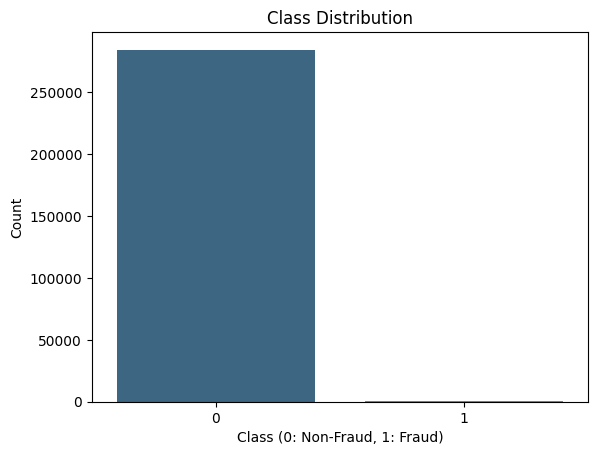

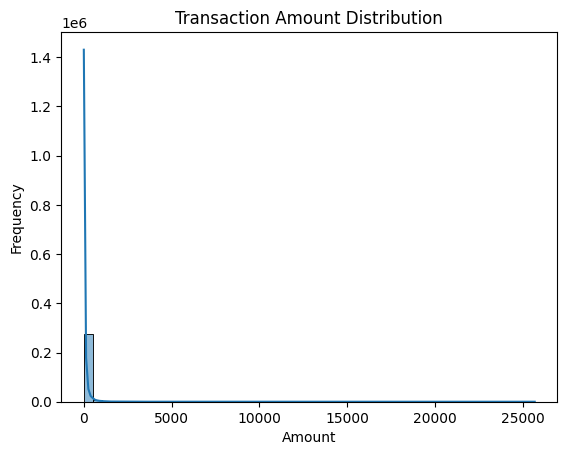

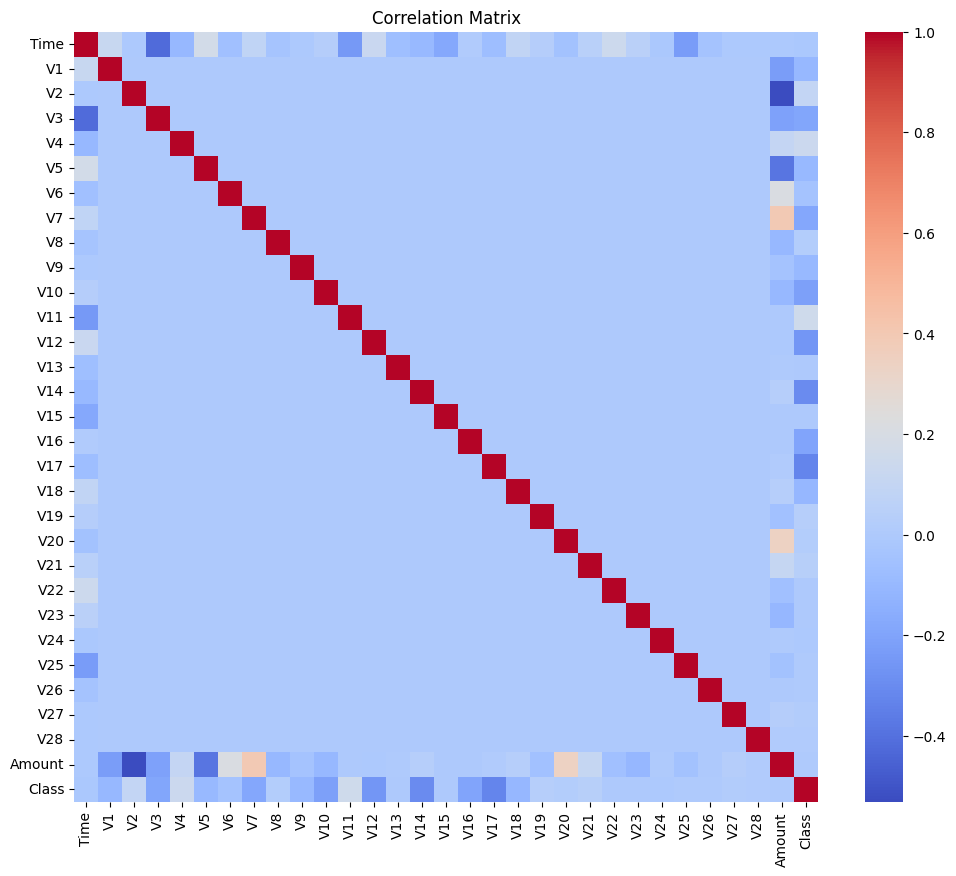

In [10]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df= pd.read_csv(r'D:\Capstone2\data\raw\creditcard.csv')

# Data overview
print(df.info())
print(df.describe())

# Class distribution
sns.countplot(x='Class', data=df, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.savefig(r'D:\Capstone2\visuals\class_distribution.png')
plt.show()

# Amount distribution
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()



In [11]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv('../data/raw/creditcard.csv')

# Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df = df.drop(['Amount', 'Time'], axis=1)

# Handle class imbalance
X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Save processed data
processed_data_path = '../data/processed/processed_data.csv'
processed_df = pd.concat([X_resampled, y_resampled], axis=1)
processed_df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")


Processed data saved to ../data/processed/processed_data.csv
